In [2]:
import seaborn as sns
from matplotlib import pyplot as plt, cm
import numpy as np
import pandas as pd

In [25]:
url = 'https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/6_SeveralNum.csv'
data = pd.read_csv(url)
data = data.set_index('Unnamed: 0')
print(data.shape)
print(data.columns)
print(data.head())

(32, 11)
Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')
                    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
Unnamed: 0                                                                   
Mazda RX4          21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

                   carb  
Unnamed: 0               
Mazda RX4             4  
Mazda RX4 Wag         4  
Datsun 710            1  
Hornet 4 Drive        1  
Hornet Sportabout     2  


# Correlogram

<Figure size 1000x1000 with 0 Axes>

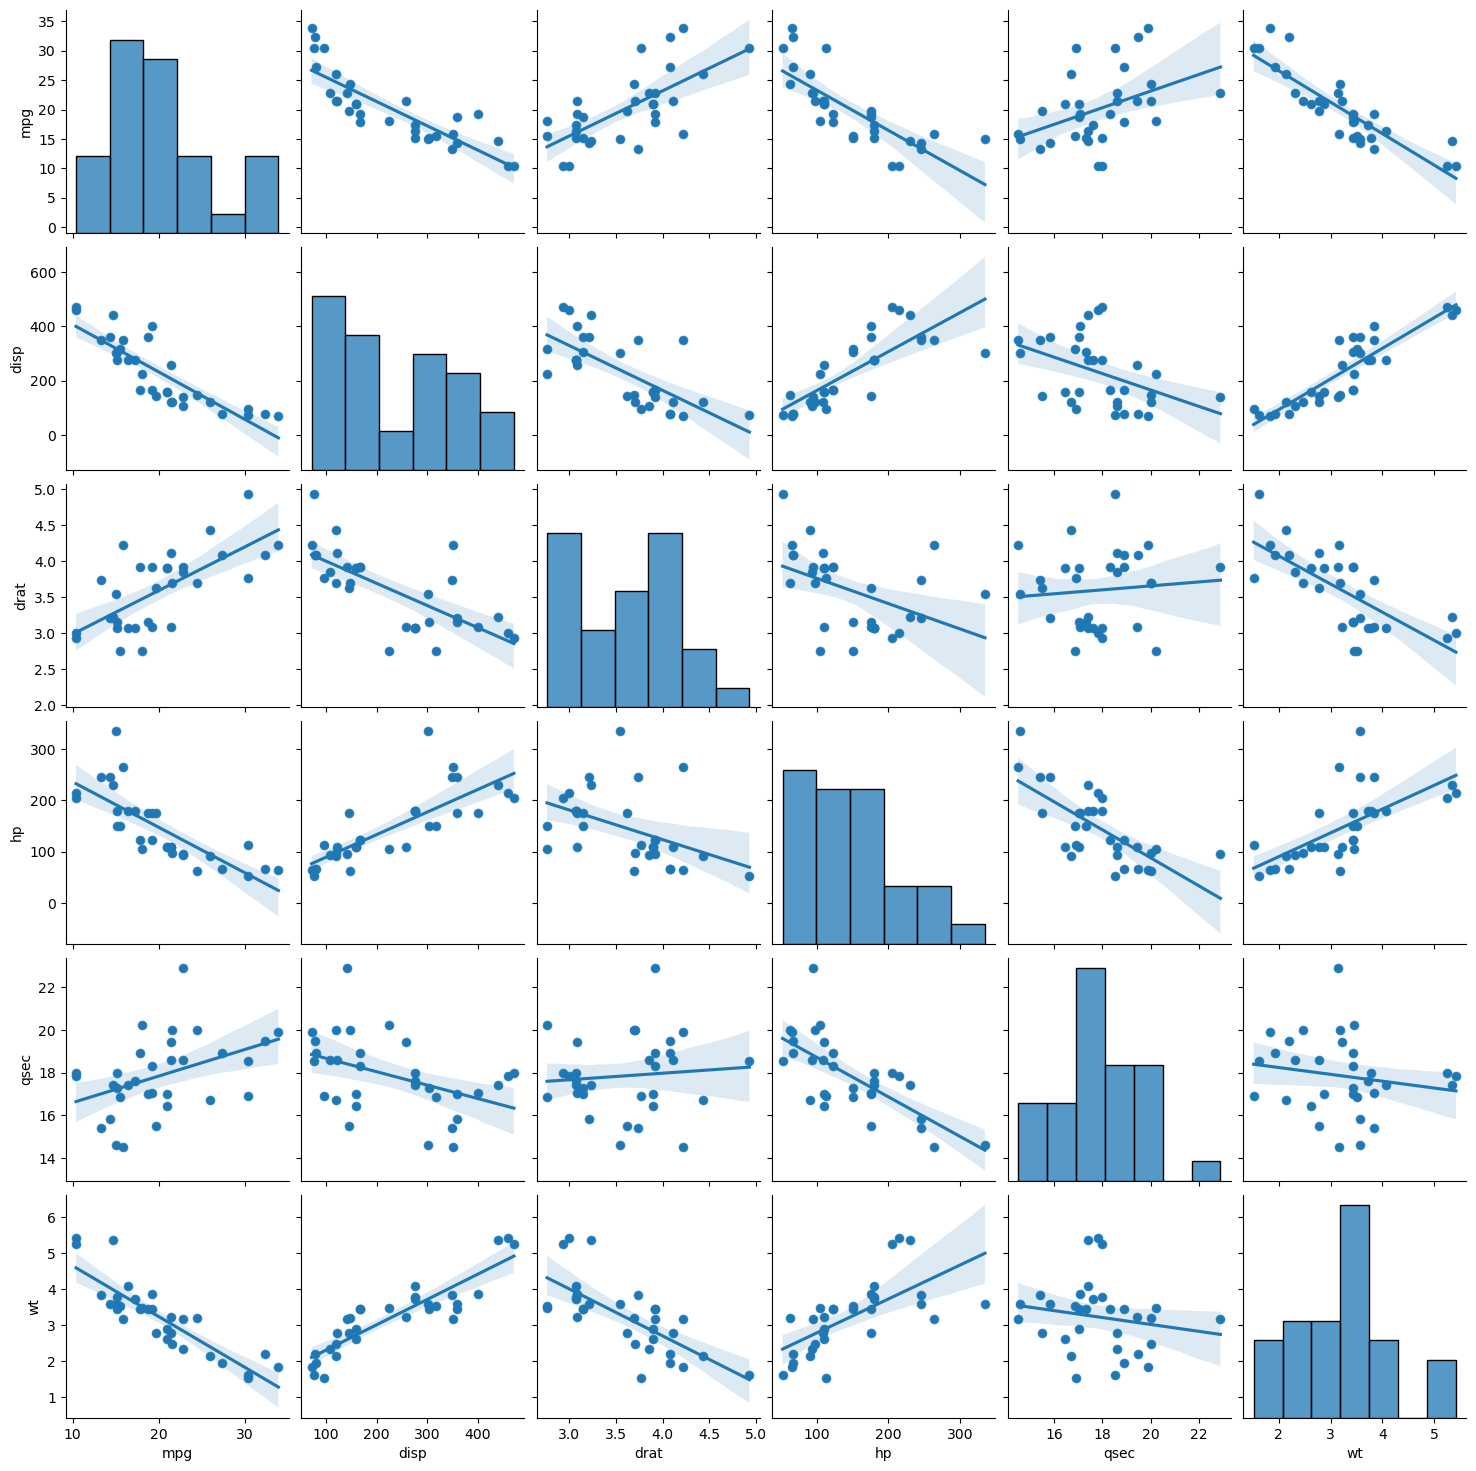

In [26]:
plt.figure(figsize=[10, 10])
g = sns.pairplot(data=data[['mpg', 'disp', 'drat', 'hp', 'qsec', 'wt']])
g.map_offdiag(sns.regplot)
plt.show()

## Dendrogram / Heatmap

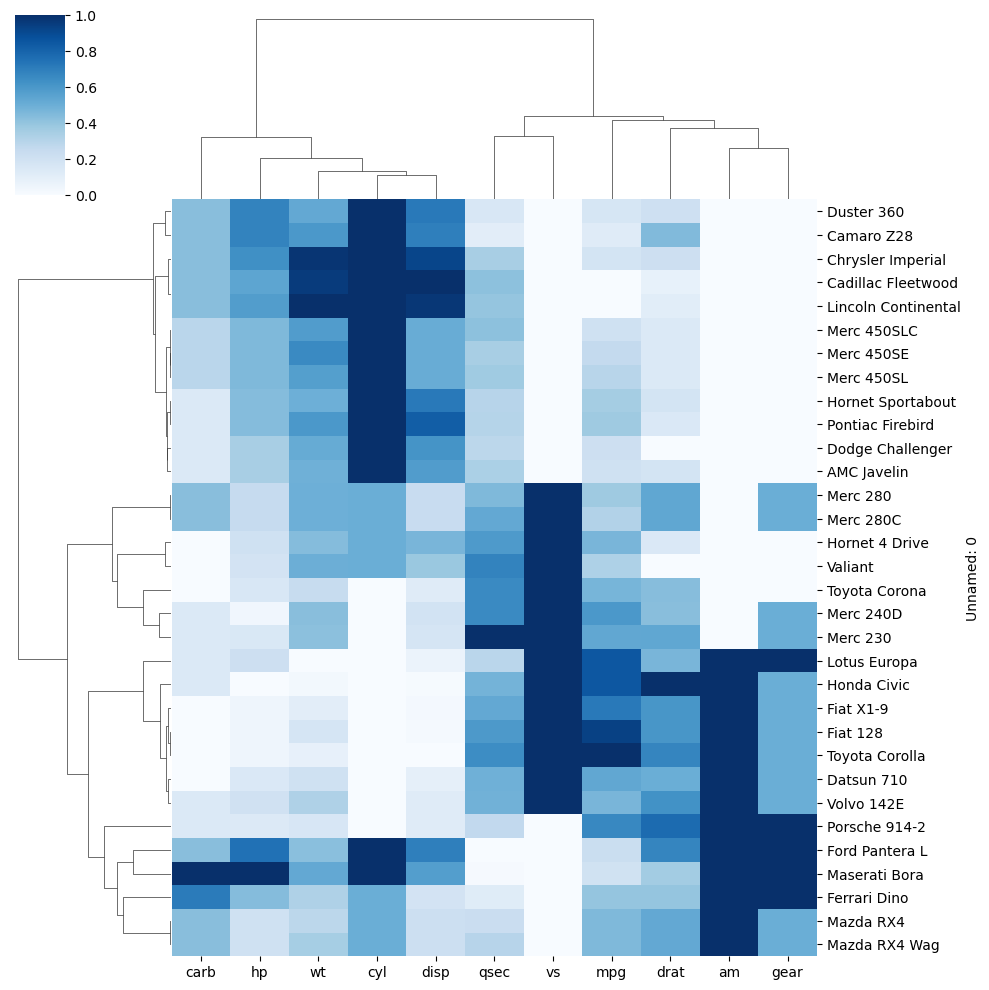

In [28]:
sns.clustermap(data, metric="correlation", method="single", cmap="Blues", standard_scale=1)
plt.show()

# PCA

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()

# Use fit and transform method
scaling.fit(data)
scaled_data=scaling.transform(data)
 
# Set the n_components=2
principal=PCA(n_components=2)
principal.fit(scaled_data)
x=principal.transform(scaled_data)
 
# Check the dimensions of data after PCA
print(x.shape)

(32, 2)


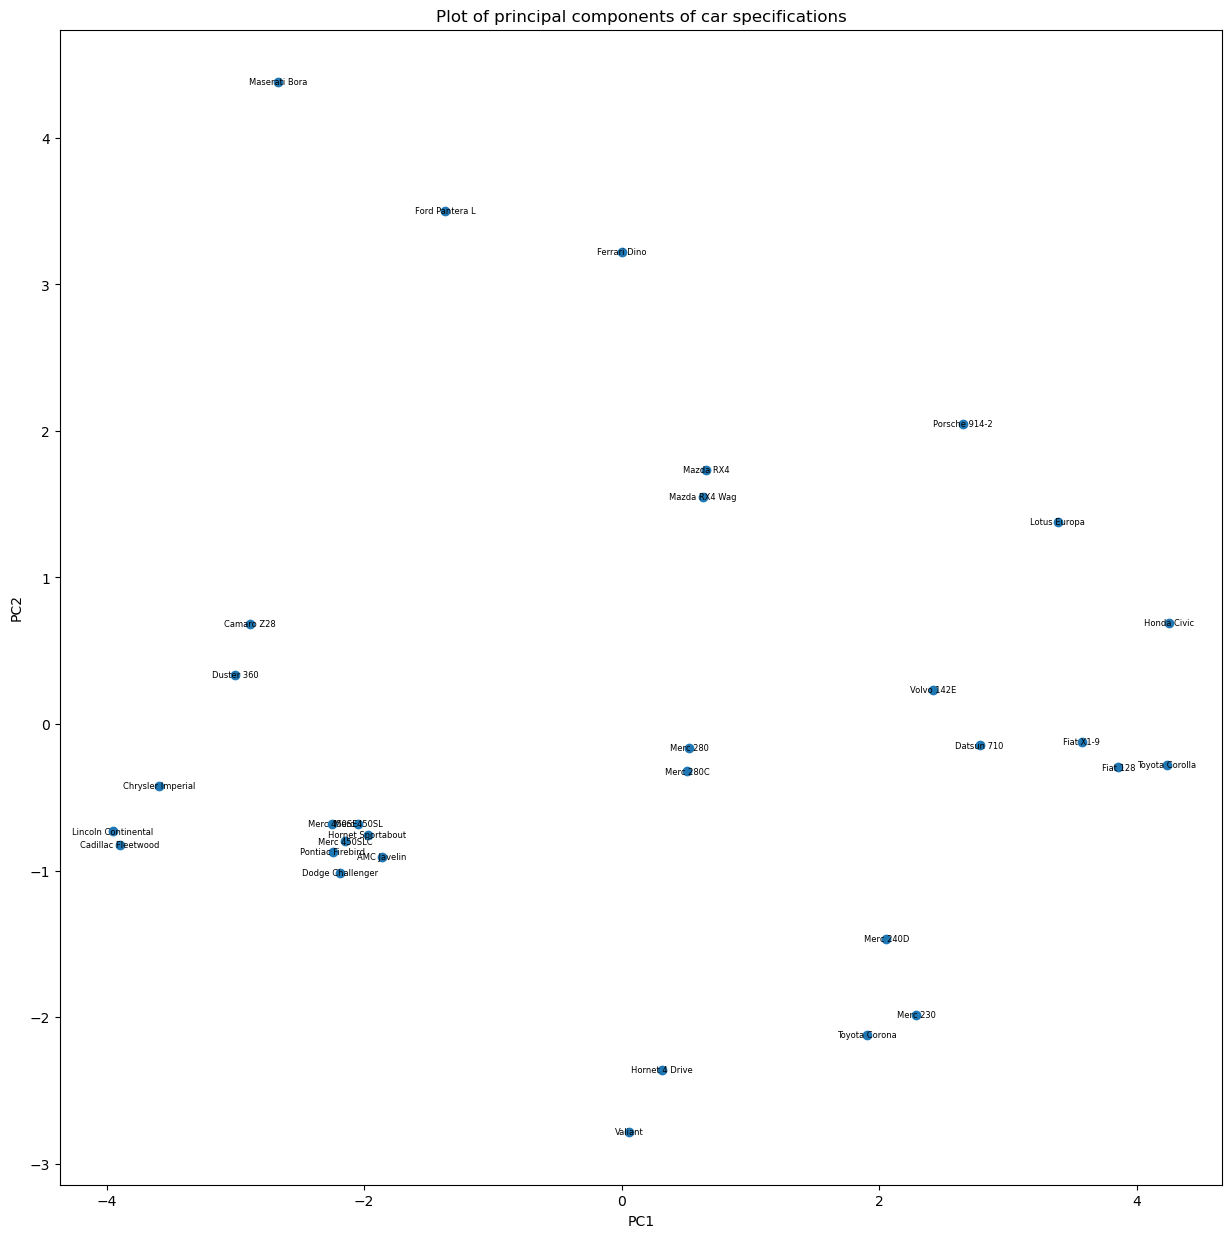

In [44]:
plt.figure(figsize=[15, 15])
scaled_data = pd.DataFrame(data=x, columns=['PC1', 'PC2'], index=data.index)
plt.scatter(scaled_data['PC1'], scaled_data['PC2'])
for i, (xi, yi) in enumerate(scaled_data.values):
    plt.text(xi, yi, scaled_data.index[i], va='center', ha='center', size=6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Plot of principal components of car specifications')
plt.show()